## 1. Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
tips = sns.load_dataset('tips')

# Preview data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Count of Customers by Day

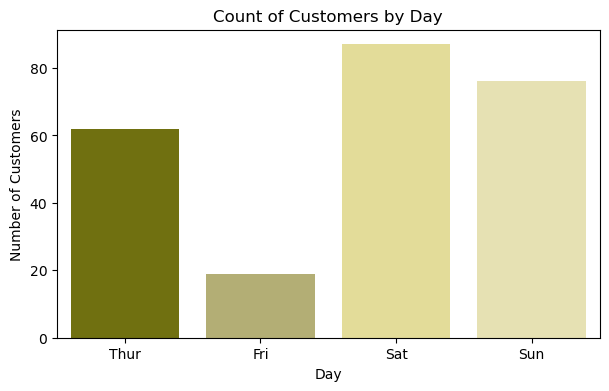

In [2]:
plt.figure(figsize=(7,4))

color_bar = ['olive', 'darkkhaki', 'khaki', 'palegoldenrod']

sns.countplot(data=tips, x='day', hue='day', palette=color_bar, legend=False)

plt.title('Count of Customers by Day')
plt.xlabel('Day')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
## ## Insight:
Saturday has the highest number of customers.

## 3. Average Tip Amount by Day

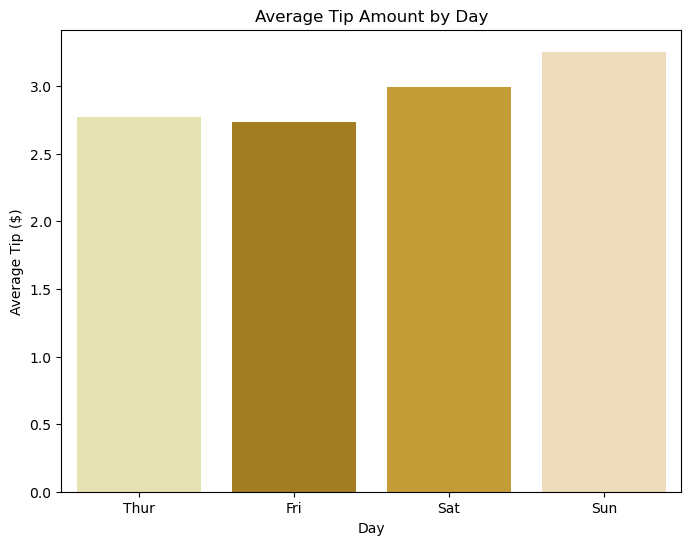

In [4]:
plt.figure(figsize=(8,6))

color_bar = ['palegoldenrod','darkgoldenrod','goldenrod', 'wheat']

sns.barplot(data=tips,x='day',y='tip',hue='day', estimator=np.mean, palette=color_bar, errorbar=None, legend=False)

plt.title('Average Tip Amount by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip ($)')
plt.show()


In [ ]:
## Insight:
Saturday has the highest average tip.

## 4. Gender Distribution & Weekday Analysis

In [5]:
## Filter Weekdays (Thu & Fri):

weekdays_data = tips[tips['day'].isin(['Thur', 'Fri'])]
weekday_gender_count = weekdays_data['sex'].value_counts()
weekday_gender_count

sex
Female    41
Male      40
Name: count, dtype: int64

In [ ]:
## Pie Chart:

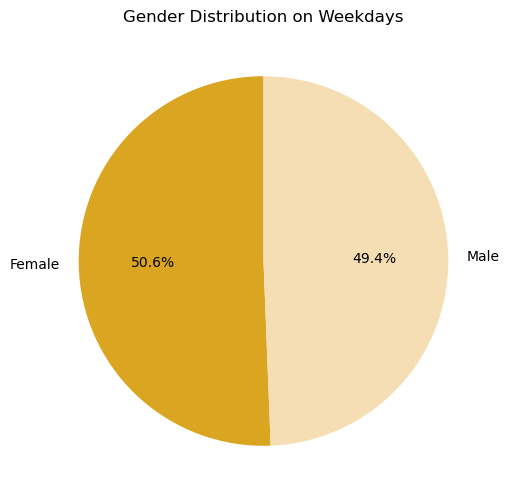

In [6]:
plt.figure(figsize=(6,6))

weekday_gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['goldenrod', 'wheat'])

plt.title('Gender Distribution on Weekdays')
plt.ylabel('')
plt.show()


In [ ]:
## Insight:
-Female customers have a slightly higher presence on weekdays.

## 5. Total Bill vs Tip (Gender & Time):

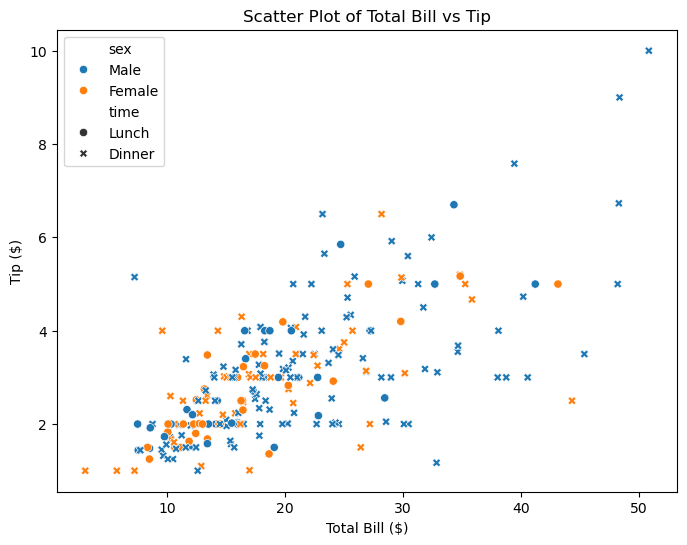

In [7]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='time')

plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.show()

In [ ]:
## Insight:

-Tip increases as total bill increases

-Dinner bills are higher than lunch

-Similar tipping behavior across genders.

## 6. Average Total Bill by Day:

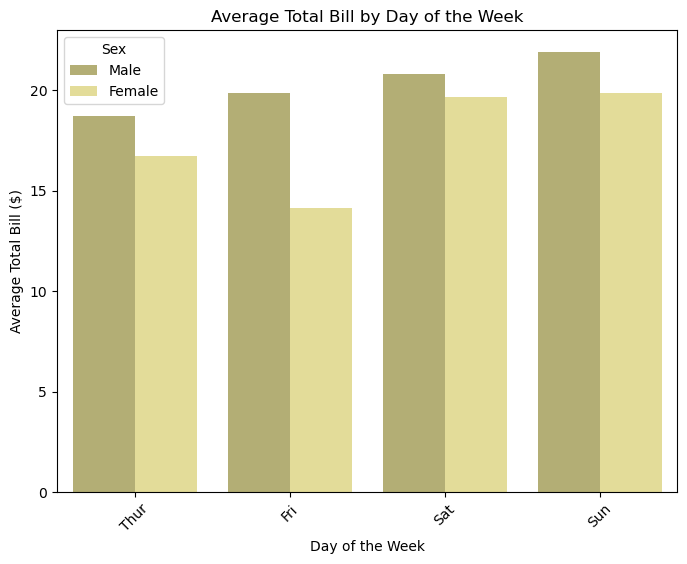

In [24]:
plt.figure(figsize=(8,6))

sns.barplot(data=tips, x='day', y='total_bill', hue='sex', estimator=np.mean, errorbar=None, palette={'Male': 'darkkhaki', 'Female': 'khaki'})

plt.title('Average Total Bill by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Bill ($)')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

In [ ]:
## Insight:

-Saturday has the highest average total bill for both genders.

## 7. Total Bill vs Tip:

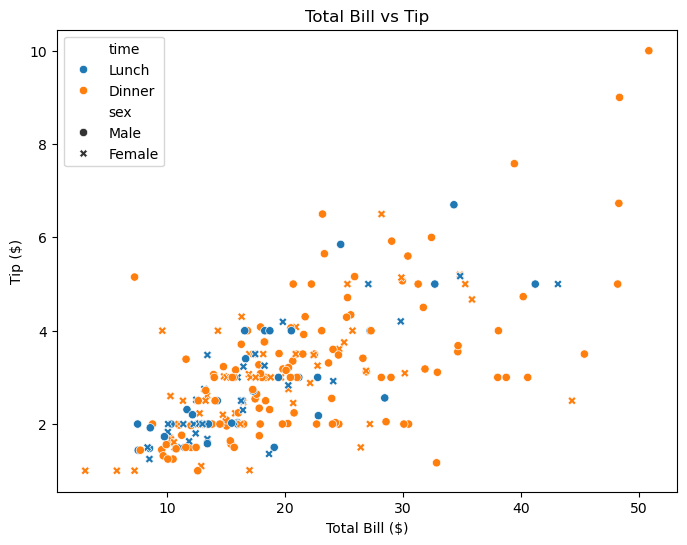

In [25]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='sex')

plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.show()


In [ ]:
## Insight:

Dinner customers generally spend and tip more than lunch customers.

## 8. Correlation Analysis of Numerical Features(total bill, tip, and party size)

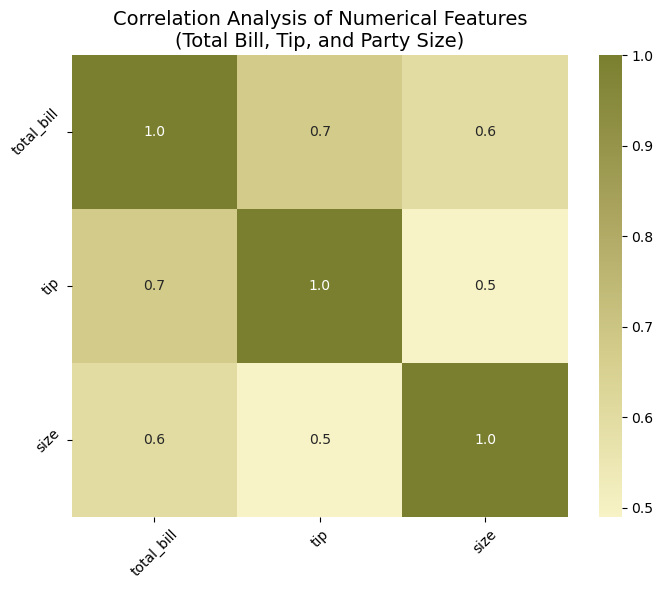

In [19]:
# Select numerical columns
num_cols = tips.select_dtypes(include='number')

# Correlation matrix
corr = num_cols.corr()

from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list(
    "warm_khaki",
    ['#f7f3c6', '#d6cf8e', '#a9a35e', '#7a7f2f']
)

plt.figure(figsize=(8,6))

sns.heatmap(corr, annot=True, fmt='.1f', cbar=True,   cmap=custom_cmap)

plt.title(
    'Correlation Analysis of Numerical Features\n(Total Bill, Tip, and Party Size)',
    fontsize=14
   )
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [ ]:
## Insight:
-Strong positive correlation between total_bill and tip.

## 9. Gender Distribution Across Days of the Week:

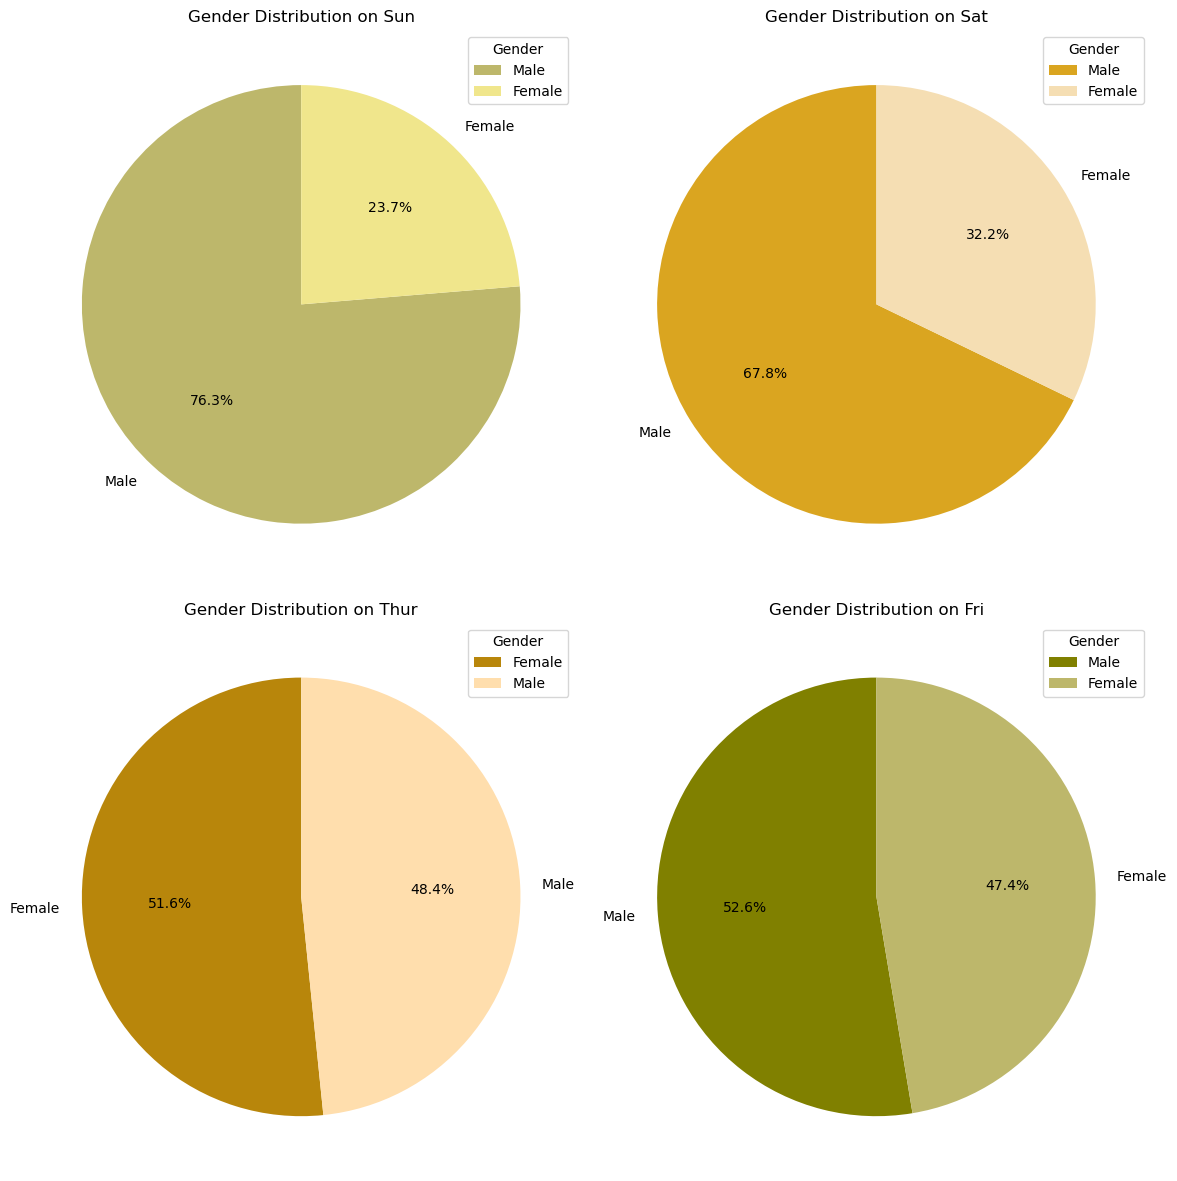

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))

days = tips['day'].unique()

colors_map = {
    'Thur': ['darkgoldenrod','navajowhite'],
    'Fri' : ['olive', 'darkkhaki'],
    'Sat' : ['goldenrod', 'wheat'],
    'Sun' :  ['darkkhaki','khaki']
}

for index, day in enumerate(days):
    day_data = tips[tips['day'] == day]
    sex_count = day_data['sex'].value_counts()

    ax = axes[index // 2, index % 2]

    ax.pie(
        sex_count,
        labels=sex_count.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors_map[day]
    )

    ax.set_title(f'Gender Distribution on {day}')
    ax.legend(title='Gender')

plt.tight_layout()
plt.show()


In [ ]:
## Insight:
-Thursday shows a relatively higher proportion of female customers.

## Final Project Summary:

-Saturday is the busiest and highest-spending day

-Tips strongly depend on total bill amount

-Dinner customers spend and tip more than lunch customers

-Gender distribution is balanced with slight weekday variation